Files found: ['C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\0 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\1 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\12 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\18 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\24 houres.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\3 hours .jpg']
time= 0 hr   Scratch area= 38784 pix²
time= 1 hr   Scratch area= 37291 pix²
time= 2 hr   Scratch area= 27452 pix²
time= 3 hr   Scratch area= 23803 pix²
time= 4 hr   Scratch area= 19872 pix²
time= 5 hr   Scratch area= 33257 pix²
y =  -2386.8857142857146 x  +  36043.71428571429
R² =  0.34575113719633155


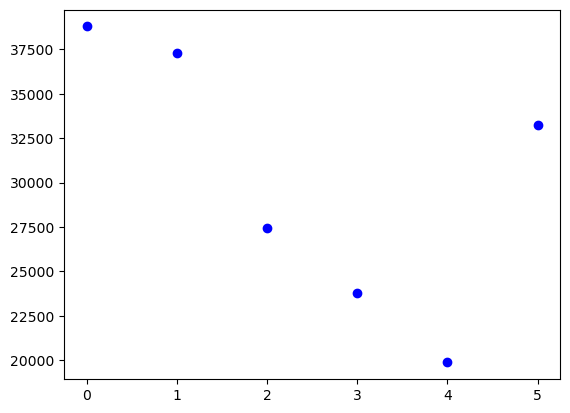

In [1]:
import matplotlib.pyplot as plt
from skimage import io, color, transform, util
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = r"C:\Users\Mariam\Desktop\dip aoi\lab 4\*.*"

# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

for file in files:
    img = io.imread(file)

    # Convert the image to grayscale if it's not already
    if img.ndim == 3:
        img = color.rgb2gray(img)

    # Resize the image to a consistent size
    target_size = (256, 256)  # Adjust the target size as needed
    img = transform.resize(img, target_size, anti_aliasing=True)

    # Convert the image to uint8 to silence the warning
    img = util.img_as_ubyte(img)

    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)

# Display the scatter plot
plt.show()

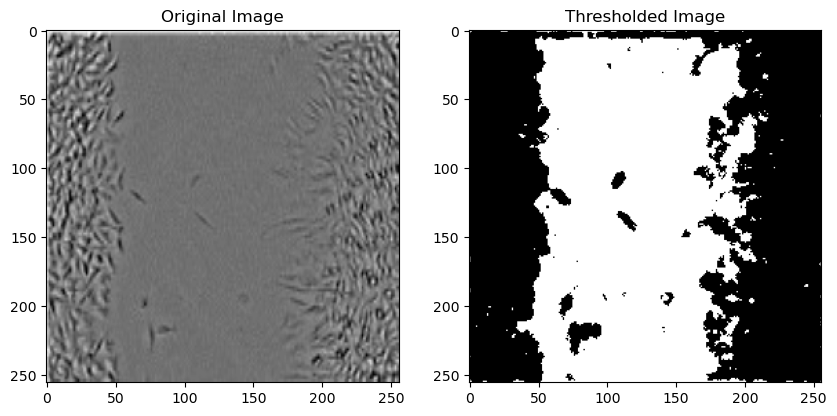

In [2]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Image')

plt.show()


Files found: ['C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\0 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\1 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\12 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\18 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\24 houres.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\3 hours .jpg']


C:\Users\Mariam\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


time= 0 hr   Scratch area= 11573 pix²
time= 1 hr   Scratch area= 11644 pix²
time= 2 hr   Scratch area= 8599 pix²
time= 3 hr   Scratch area= 7723 pix²
time= 4 hr   Scratch area= 6805 pix²
time= 5 hr   Scratch area= 10926 pix²


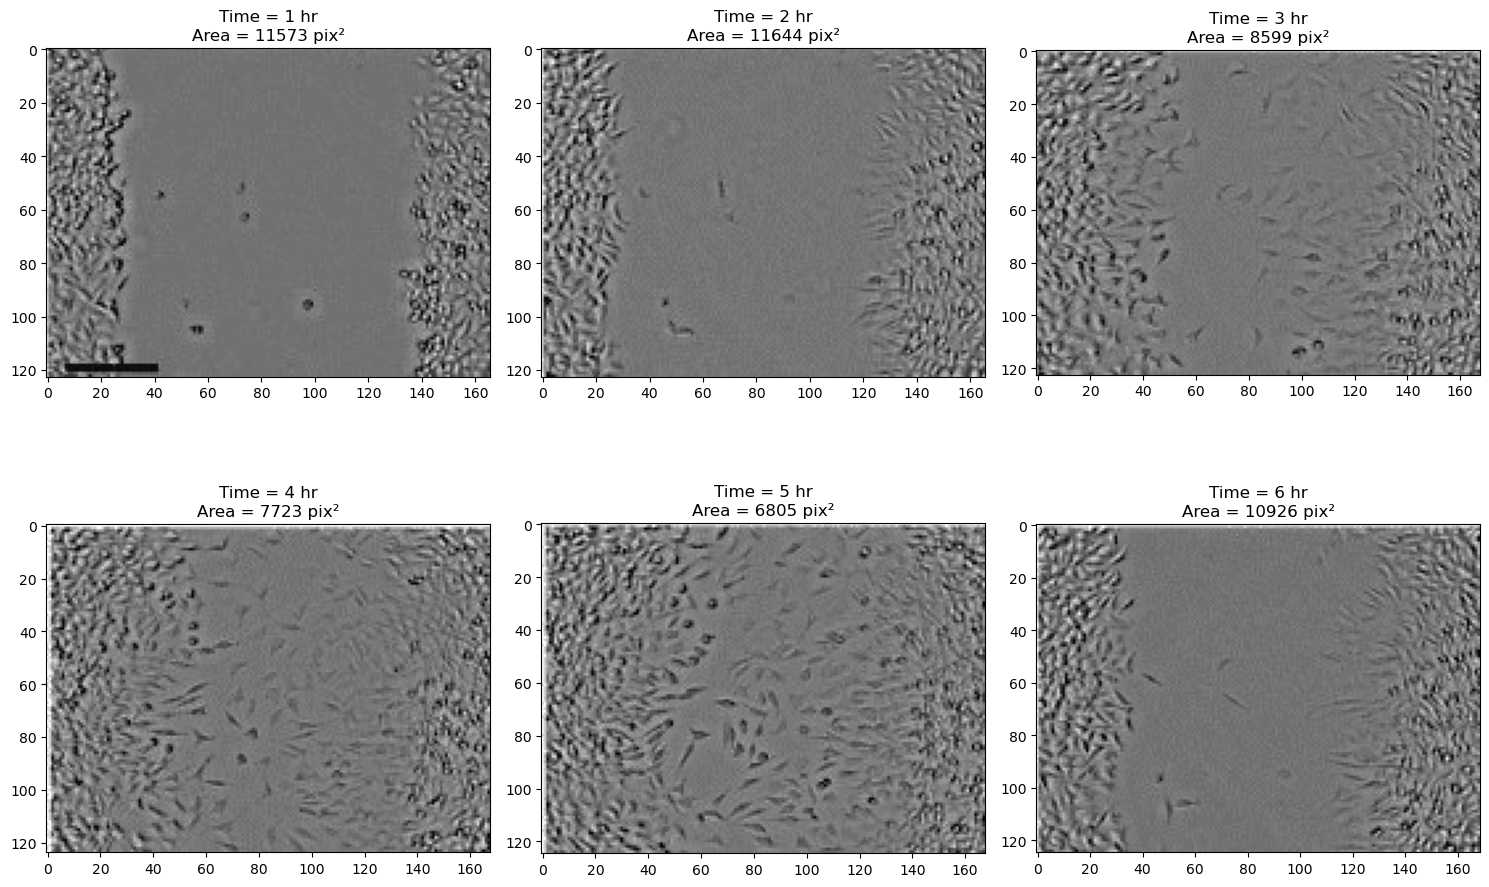

y =  -532.2285714285714 x  +  10875.571428571428
R² =  0.223821067393144


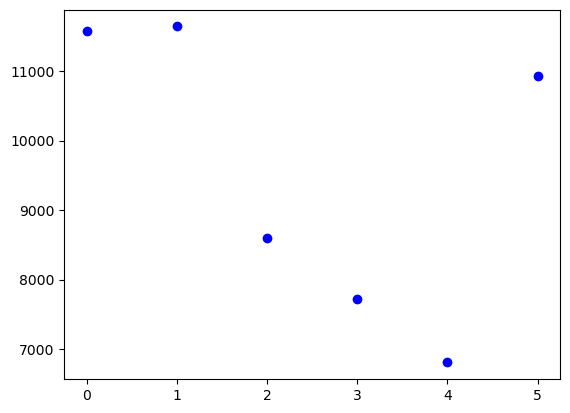

In [3]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = r"C:\Users\Mariam\Desktop\dip aoi\lab 4\*.*"
# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

# Calculate the number of rows and columns needed for the subplot grid
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, file in enumerate(files):
    img = io.imread(file)

    # Convert to grayscale if the image is not already in grayscale
    if img.ndim == 3:
        img = color.rgb2gray(img)

    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    # Calculate the subplot index
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Display the original image and the thresholded image in the subplot
    axes[row_idx, col_idx].imshow(img, cmap='gray')
    axes[row_idx, col_idx].set_title(f'Time = {time} hr\nArea = {scratch_area} pix²')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)

Files found: ['C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\0 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\1 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\12 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\18 hours.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\24 houres.jpg', 'C:\\Users\\Mariam\\Desktop\\dip aoi\\lab 4\\3 hours .jpg']
time= 0 hr   Scratch area= 11573 pix²
time= 1 hr   Scratch area= 11644 pix²
time= 2 hr   Scratch area= 8599 pix²
time= 3 hr   Scratch area= 7723 pix²
time= 4 hr   Scratch area= 6805 pix²
time= 5 hr   Scratch area= 10926 pix²


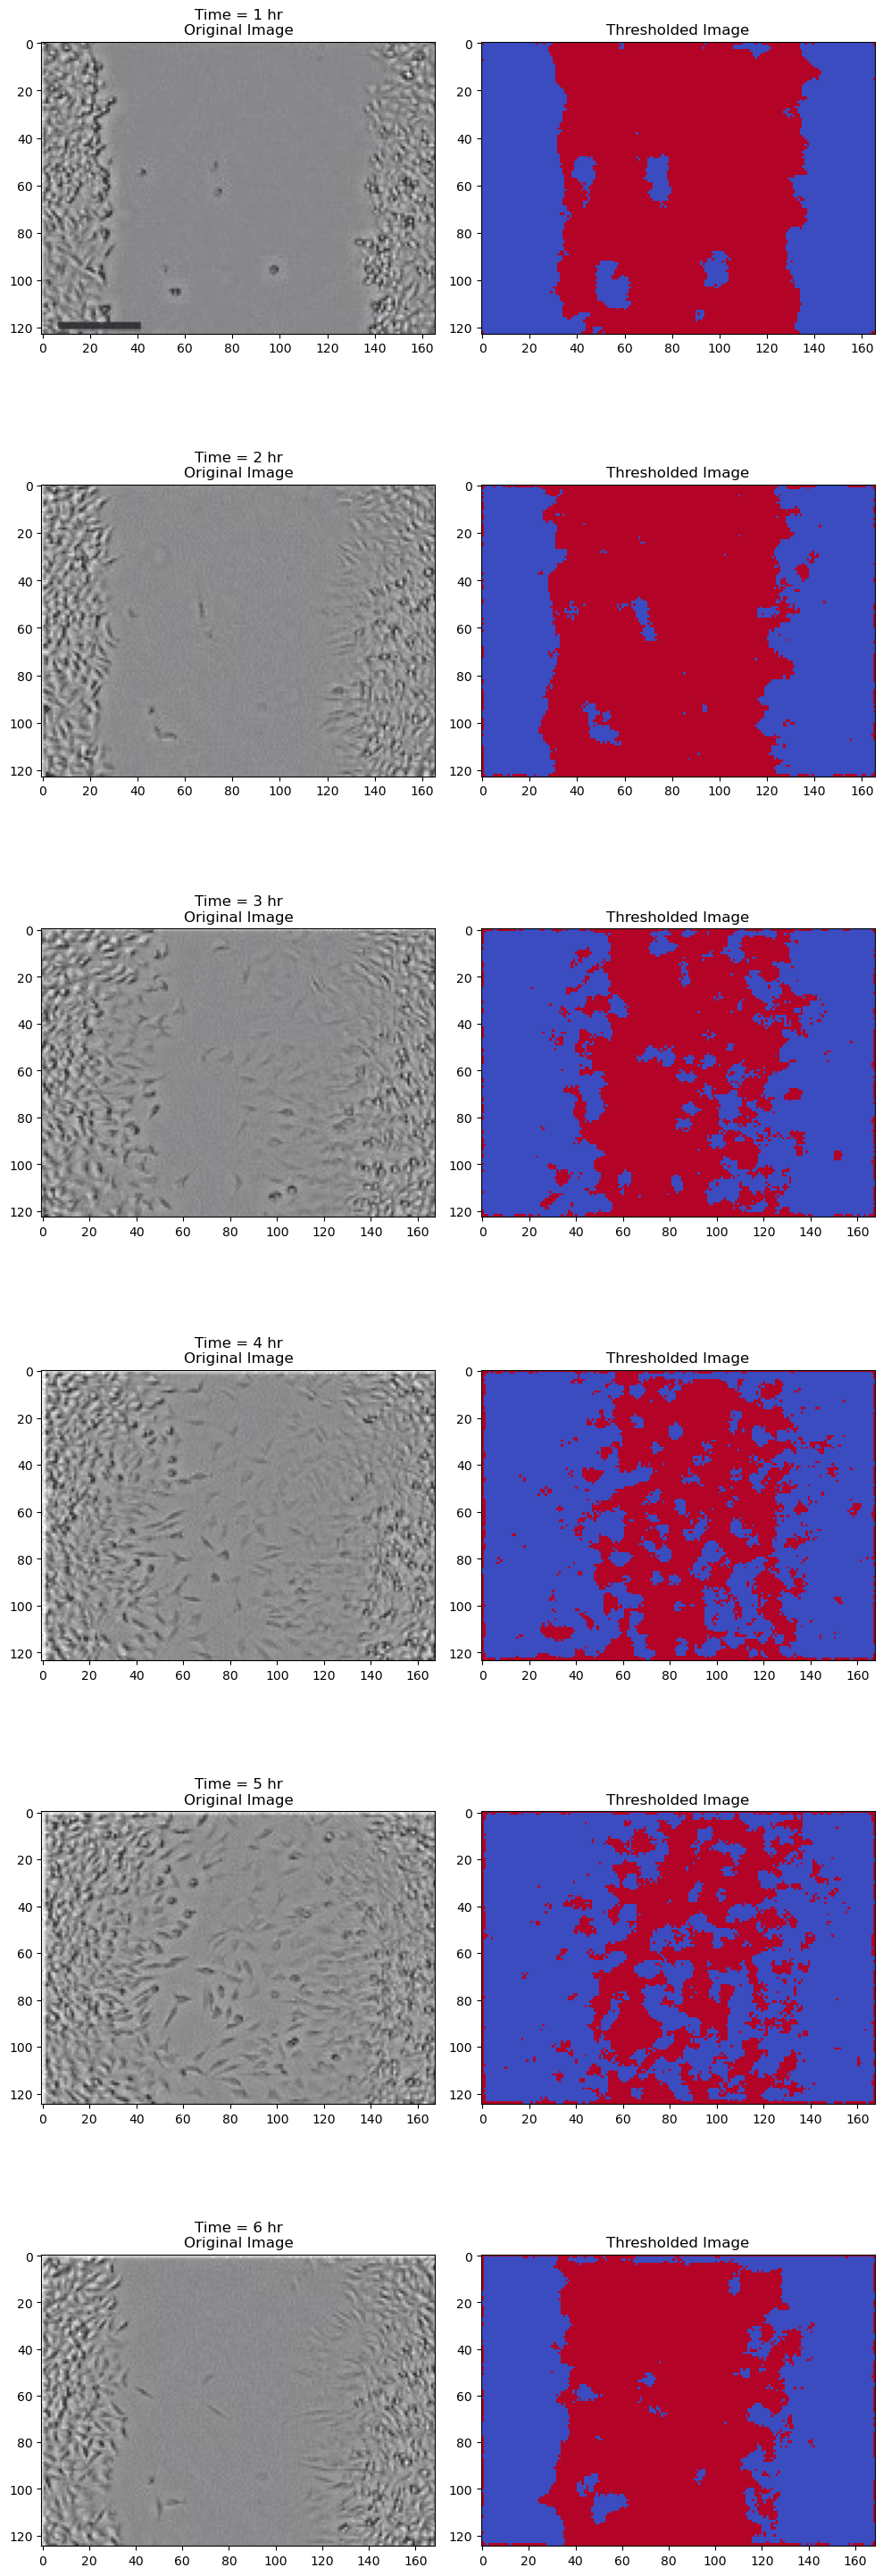

y =  -532.2285714285714 x  +  10875.571428571428
R² =  0.223821067393144


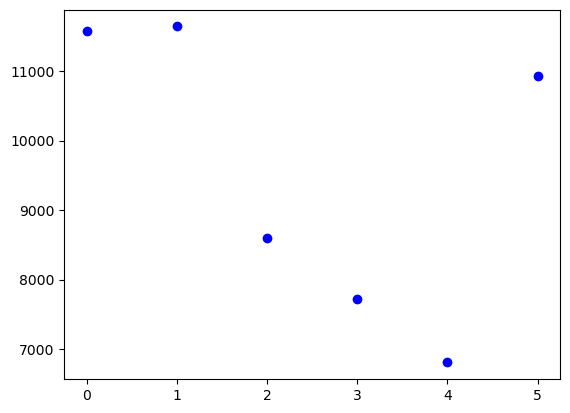

In [4]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = r"C:\Users\Mariam\Desktop\dip aoi\lab 4\*.*"
# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

num_images = len(files)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))

for idx, file in enumerate(files):
    img = io.imread(file)
    
    # Convert the image to grayscale
    gray_img = color.rgb2gray(img)
    
    entropy_img = entropy(gray_img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

    # Display the original image in the left column
    axes[idx, 0].imshow(img, cmap='gray')
    axes[idx, 0].set_title(f'Time = {time} hr\nOriginal Image')

    # Display the thresholded image in the right column with a binary colormap
    axes[idx, 1].imshow(binary, cmap='coolwarm', interpolation='none')
    axes[idx, 1].set_title('Thresholded Image')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)